## Transfer Learning - 1 
- Making Predictions using Pre-trained Networks
- References :
- https://cs231n.github.io/transfer-learning/
- https://keras.io/api/applications/

In [2]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
ResNet50?

In [4]:
#create the model
model = ResNet50(weights='imagenet') 
#It will load the model with weights learned during training on imagenet dataset. optionally
# you can set path to weights stored at local storage as well

102973440/102967424 [==============================] - 17s 0us/step


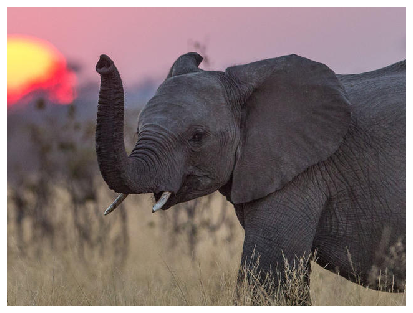

In [47]:
img=image.load_img('image.jpg')
img=image.img_to_array(img)
img=np.asarray(img,dtype='int32') #for pixel values in [0,255] keras expect int datatype and 
plt.imshow(img)                   # for [0,1] float
plt.axis('off')
plt.show()

In [48]:
# preprocess_input?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


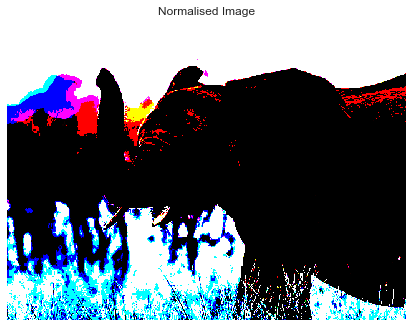

In [49]:
# preprocess_input function is used to apply same transformation as applied to imagenet dataset
# while training it
img=preprocess_input(img)
plt.imshow(img)                 
plt.axis('off')
plt.title('Normalised Image')
plt.show()

In [50]:
# decode_predictions?

# decode_predictions(preds, top=5) - Decodes the prediction of an ImageNet model.
# Arguments:
# preds: Numpy array encoding a batch of predictions.
# top: Integer, how many top-guesses to return. Defaults to 5.
# Returns:list of lists of top class prediction tuples :`(class_name, class_description, score)`.
# One list of tuples per sample in batch input.
# Raises: ValueError: In case of invalid shape of the `pred` array (must be 2D).

In [51]:
print(img.shape)

(480, 640, 3)


In [52]:
img=img.reshape((1,*img.shape)) #predict expects a batch of images of created batch of 1 image
preds = model.predict(img)
print('Predicted:', decode_predictions(preds, top=3))

Predicted: [[('n02504458', 'African_elephant', 0.36858362), ('n01871265', 'tusker', 0.28206596), ('n02504013', 'Indian_elephant', 0.10021325)]]


In [54]:
print(type(preds),preds.shape) 
# preds has answer for every 1000 class in imagenet dataset

<class 'numpy.ndarray'> (1, 1000)
